<a href="https://colab.research.google.com/github/lakshitgosain/Tensorflow-ZTM/blob/main/TF_ZTM_03_Comuter_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to Convolutional Neural Network and Computer Vision with TensorFlow

## Get the Data

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2023-05-26 08:35:52--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.194.128, 74.125.68.128, 172.253.118.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.194.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  21.2MB/s    in 6.3s    

2023-05-26 08:35:58 (16.5 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [2]:
#Unzip the Downloaded file
zip_ref=zipfile.ZipFile("pizza_steak.zip")

In [3]:
zip_ref.extractall()
zip_ref.close()

In [4]:
!ls pizza_steak

test  train


In [5]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.


In [6]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

In [7]:

# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [8]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (382, 512, 3)


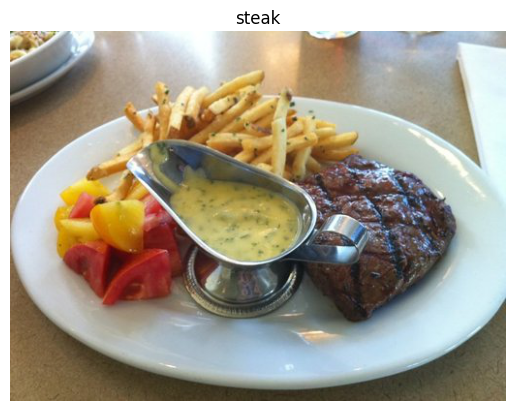

In [9]:


# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

In [10]:
# View the img (actually just a big array/tensor)
img

array([[[ 91, 109,  67],
        [ 85, 100,  59],
        [112, 123,  81],
        ...,
        [162, 165, 158],
        [160, 163, 156],
        [159, 162, 153]],

       [[105, 122,  86],
        [118, 132,  97],
        [148, 158, 123],
        ...,
        [161, 164, 157],
        [159, 162, 155],
        [159, 160, 152]],

       [[148, 162, 139],
        [176, 188, 164],
        [205, 211, 185],
        ...,
        [160, 161, 155],
        [158, 159, 153],
        [157, 158, 150]],

       ...,

       [[133, 108,  67],
        [132, 107,  66],
        [135, 110,  69],
        ...,
        [122, 111,  79],
        [121, 112,  79],
        [121, 112,  79]],

       [[124,  99,  58],
        [130, 105,  64],
        [136, 111,  70],
        ...,
        [125, 115,  80],
        [127, 117,  82],
        [124, 116,  80]],

       [[124,  99,  58],
        [131, 106,  65],
        [138, 113,  72],
        ...,
        [127, 117,  82],
        [131, 121,  86],
        [126, 118,  82]]

In [11]:
# Get all the pixel values between 0 & 1
img/255. 

array([[[0.35686275, 0.42745098, 0.2627451 ],
        [0.33333333, 0.39215686, 0.23137255],
        [0.43921569, 0.48235294, 0.31764706],
        ...,
        [0.63529412, 0.64705882, 0.61960784],
        [0.62745098, 0.63921569, 0.61176471],
        [0.62352941, 0.63529412, 0.6       ]],

       [[0.41176471, 0.47843137, 0.3372549 ],
        [0.4627451 , 0.51764706, 0.38039216],
        [0.58039216, 0.61960784, 0.48235294],
        ...,
        [0.63137255, 0.64313725, 0.61568627],
        [0.62352941, 0.63529412, 0.60784314],
        [0.62352941, 0.62745098, 0.59607843]],

       [[0.58039216, 0.63529412, 0.54509804],
        [0.69019608, 0.7372549 , 0.64313725],
        [0.80392157, 0.82745098, 0.7254902 ],
        ...,
        [0.62745098, 0.63137255, 0.60784314],
        [0.61960784, 0.62352941, 0.6       ],
        [0.61568627, 0.61960784, 0.58823529]],

       ...,

       [[0.52156863, 0.42352941, 0.2627451 ],
        [0.51764706, 0.41960784, 0.25882353],
        [0.52941176, 0

## An end to end example
Let's build an End to end Neural Network
* Load our images
* preprocess
* Build CNN to find patterns
* Compile the CNN
* Fit the CNN

In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

#preprocess data (Get all the pixel values to be between 0 &1, also called normalization)

train_datagen=ImageDataGenerator(rescale=1./255)
valid_datagen=ImageDataGenerator(rescale=1./255)

train_dir="/content/pizza_steak/train"
test_dir="pizza_steak/test"

#import data from directories and turn it into batches
train_data=train_datagen.flow_from_directory(directory=train_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode='binary',
                                             seed=42)

valid_data=valid_datagen.flow_from_directory(directory=test_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode='binary',
                                             seed=42)
model_1= tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding='valid'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation='sigmoid')
    
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_1=model_1.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 23s 251ms/step - loss: 0.5653 - accuracy: 0.6967 - val_loss: 0.4567 - val_accuracy: 0.7920
Epoch 2/5
47/47 [==============================] - 10s 222ms/step - loss: 0.4494 - accuracy: 0.8033 - val_loss: 0.4391 - val_accuracy: 0.8040
Epoch 3/5
47/47 [==============================] - 10s 217ms/step - loss: 0.4310 - accuracy: 0.8093 - val_loss: 0.3702 - val_accuracy: 0.8480
Epoch 4/5
47/47 [==============================] - 11s 236ms/step - loss: 0.3658 - accuracy: 0.8540 - val_loss: 0.4126 - val_accuracy: 0.8040
Epoch 5/5
47/47 [==============================] - 10s 208ms/step - loss: 0.3028 - accuracy: 0.8887 - val_loss: 0.4404 - val_accuracy: 0.8140


In [13]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [14]:
#Using the sae model as before with the different dataset

In [15]:
tf.random.set_seed(42)

#Create a model
model_2=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model_2.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_2=model_2.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 191ms/step - loss: 1.4080 - accuracy: 0.5040 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 11s 227ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 10s 208ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 10s 208ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 12s 259ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [16]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [17]:
tf.random.set_seed(42)

model_3=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_3.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
history_3=model_3.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data)) 

Epoch 1/5
47/47 [==============================] - 11s 210ms/step - loss: 2.2270 - accuracy: 0.6113 - val_loss: 0.5511 - val_accuracy: 0.7700
Epoch 2/5
47/47 [==============================] - 12s 256ms/step - loss: 0.8487 - accuracy: 0.6920 - val_loss: 1.2675 - val_accuracy: 0.6020
Epoch 3/5
47/47 [==============================] - 9s 201ms/step - loss: 0.6638 - accuracy: 0.7373 - val_loss: 0.4437 - val_accuracy: 0.7960
Epoch 4/5
47/47 [==============================] - 9s 189ms/step - loss: 0.4713 - accuracy: 0.7960 - val_loss: 0.4407 - val_accuracy: 0.7940
Epoch 5/5
47/47 [==============================] - 10s 211ms/step - loss: 0.4807 - accuracy: 0.7860 - val_loss: 0.4739 - val_accuracy: 0.7880


In [18]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


Even though there are less number of features/parameters in the Model 1 or any model in General, it is better in to decypher the patterns in the data. This is against the theory of more is better.


## Binary Classification: Let's break it down

1. Become one with the data
2. Preprocess the data.
(prepare it for th model, the main step here is scaling/normalizing)
3. Created a model (started with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different params and improve the model
7. Repeat iuntil satisfied

### 1. Become one with the data

Image shape: (512, 512, 3)
Image shape: (512, 512, 3)


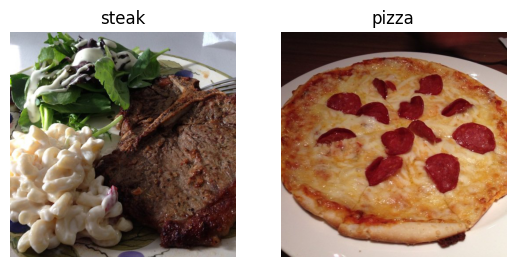

In [19]:
#Visualize the data
plt.figure()
plt.subplot(1,2,1)
steak_img= view_random_image("pizza_steak/train/","steak")
plt.subplot(1,2,2)
pizza_img=view_random_image("pizza_steak/train/","pizza")

### 2. Preprocess the data (prepare it for a model)

In [20]:
#Define directory dataset paths
train_dir="pizza_steak/train/"
test_dir="pizza_steak/test/"

Our next step is turning our data into **batches**

A batch is a small subset of the data. Rather than look at all ~10k images at a time, a model might only look at 32 at a time.

It does this for a couple of reasons:
1. 10000 images might not fit into the memory of your processor(GPU)
2. Trying to learn the patterns in 10000 images in one hit coud result in the model not being able to learn very well.

Why 32??

Because 32 is good.

In [21]:
#Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)

In [22]:
# Load in out image data from the directories and turn them into batches

train_data=train_datagen.flow_from_directory(directory=train_dir,
                                             target_size=(224,224),
                                             class_mode='binary',
                                             batch_size=32)

test_data=test_datagen.flow_from_directory(directory=test_dir,
                                           target_size=(224,224),
                                           class_mode='binary',
                                           batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [23]:
#Get a sample of training data batch
images, labels=train_data.next() #Get the next batch of images in train_data
len(images), len(labels)

(32, 32)

In [24]:
#How many batches are there
len(train_data) #1500/32

47

In [25]:
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [26]:
images[7].shape

(224, 224, 3)

In [27]:
#View the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

### 3. Create a CNN Model

In [28]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D,MaxPool2D,Activation
from tensorflow.keras import Sequential

In [29]:
#Create the model( This will be our baseline model, a layer convolutional neural network)
model_4=Sequential([
    Conv2D(filters=10, #number of sliding Windows going across a inpput. Higher=more complex model
      kernel_size=3,#Size of the sliding window going across the input
      strides=(1,1),#the size of steps sliding window takes across an input 
      padding="valid", #if "same", the output shape is the same. If "Valid", the output shape is compressed
      activation='relu',
      input_shape=(224,224,3)), #Input Layer, specify input shape
    Conv2D(10,3,activation='relu'),
    Conv2D(10,3,activation='relu'),
    Flatten(),
    Dense(1, activation='sigmoid') #Output layer, working with Binary classification

])

Let's discuss some of the components of the Conv2D layer:

The "2D" means our inputs are two dimensional (height and width), even though they have 3 colour channels, the convolutions are run on each channel invididually.
filters - these are the number of "feature extractors" that will be moving over our images.
kernel_size - the size of our filters, for example, a kernel_size of (3, 3) (or just 3) will mean each filter will have the size 3x3, meaning it will look at a space of 3x3 pixels each time. The smaller the kernel, the more fine-grained features it will extract.
stride - the number of pixels a filter will move across as it covers the image. A stride of 1 means the filter moves across each pixel 1 by 1. A stride of 2 means it moves 2 pixels at a time.
padding - this can be either 'same' or 'valid', 'same' adds zeros the to outside of the image so the resulting output of the convolutional layer is the same as the input, where as 'valid' (default) cuts off excess pixels where the filter doesn't fit (e.g. 224 pixels wide divided by a kernel size of 3 (224/3 = 74.6) means a single pixel will get cut off the end.
What's a "feature"?

A feature can be considered any significant part of an image. For example, in our case, a feature might be the circular shape of pizza. Or the rough edges on the outside of a steak.

It's important to note that these features are not defined by us, instead, the model learns them as it applies different filters across the image.

In Deep Learning, there is almost an infinate amout of architestures we can create, one of the best ways to start is to start with someting simple, and introduce complexity as and when required

In [30]:
model_4.compile(optimizer=Adam(),
                loss="binary_crossentropy",
                metrics=['accuracy'])


In [31]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [32]:
#Check the lengths of training and test data generators
len(train_data), len(test_data)
history_4=model_4.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 13s 240ms/step - loss: 0.8219 - accuracy: 0.6213 - val_loss: 0.5588 - val_accuracy: 0.7420
Epoch 2/5
47/47 [==============================] - 11s 230ms/step - loss: 0.5326 - accuracy: 0.7600 - val_loss: 0.4510 - val_accuracy: 0.8140
Epoch 3/5
47/47 [==============================] - 11s 224ms/step - loss: 0.4119 - accuracy: 0.8293 - val_loss: 0.3753 - val_accuracy: 0.8260
Epoch 4/5
47/47 [==============================] - 12s 266ms/step - loss: 0.2867 - accuracy: 0.8887 - val_loss: 0.3809 - val_accuracy: 0.8280
Epoch 5/5
47/47 [==============================] - 11s 231ms/step - loss: 0.2035 - accuracy: 0.9307 - val_loss: 0.4189 - val_accuracy: 0.8120


In [33]:
model_1.evaluate(test_data)
model_1.summary()

16/16 [==============================] - 3s 199ms/step - loss: 0.4404 - accuracy: 0.8140
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (No

In [34]:
model_4.evaluate(test_data)
model_4.summary()

16/16 [==============================] - 2s 146ms/step - loss: 0.4189 - accuracy: 0.8120
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________

### 5. Evaluate the model

<Axes: >

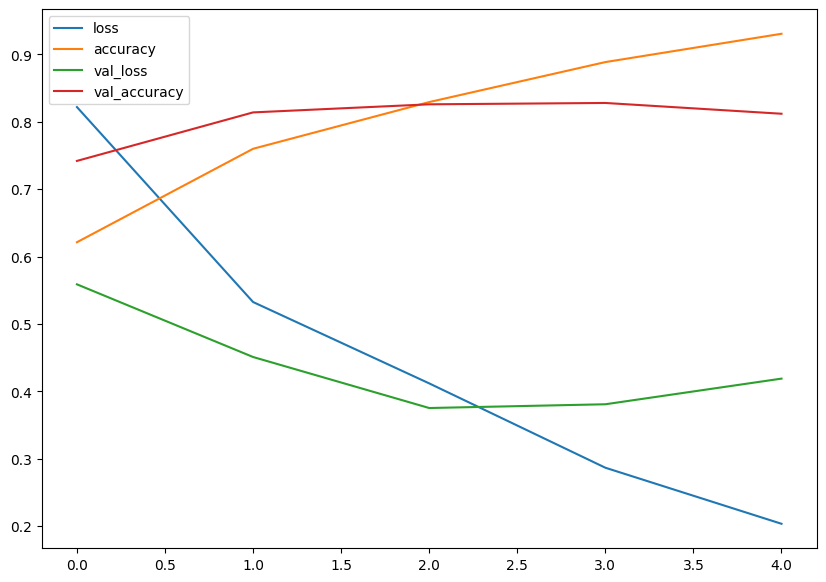

In [35]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [36]:
#Plot the vlidation and training curves separately
def plot_loss_curves(history):
  """
  Return separate loss curves for training and validation metrics.
  """
  loss= history.history["loss"]
  val_loss=history.history["val_loss"]
  accuracy= history.history["accuracy"]
  val_accuracy=history.history["val_accuracy"]
  epochs=range(len(history.history["loss"])) #How many epoochs we ran for

  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  #plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

In [37]:
#Check out the loss and accuracy of model_4

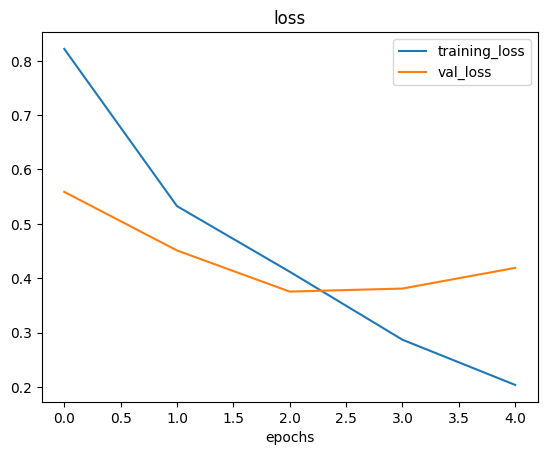

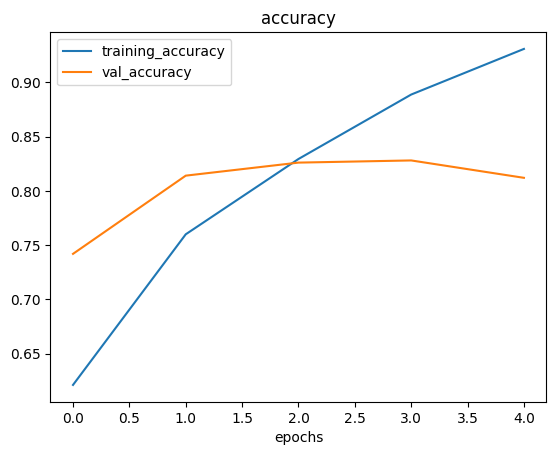

In [38]:
plot_loss_curves(history_4)

When a model's validation loss starts to increase, it's likely that the model is overfitting.

### 6 . Adjust the model's parameters

Fitting the machine learning model comes in 3 steps:

1. Create a baseline
2. beat the baseline by overfitting a large model
3. Reduce the Overfitting

Ways to induce overfitting
1. Increase the Conv Layers filters
2. Increase the number of conv layers
3. Add another Dense layer to the output of our flatten layer

Ways to reduce overfitting
1. Add Data Augmentation
2. Add regularization layers (max Pool 2D)
3. Add more data .....

Note: Reducing overfitting is also called Regularization

In [39]:
#Create the model ( this is going to be our new baseline)
model_5=Sequential([
    Conv2D(10,3,activation='relu', input_shape=(224,224,3)),
    MaxPool2D(pool_size=2), #Halves the no. of features. You can notice that in the summary of the model
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation='sigmoid')

])

In [40]:
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=['accuracy'])

In [41]:
history_5=model_5.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 14s 265ms/step - loss: 0.6350 - accuracy: 0.6127 - val_loss: 0.5448 - val_accuracy: 0.7140
Epoch 2/5
47/47 [==============================] - 18s 397ms/step - loss: 0.4347 - accuracy: 0.8040 - val_loss: 0.3641 - val_accuracy: 0.8500
Epoch 3/5
47/47 [==============================] - 11s 239ms/step - loss: 0.4135 - accuracy: 0.8220 - val_loss: 0.3496 - val_accuracy: 0.8380
Epoch 4/5
47/47 [==============================] - 10s 208ms/step - loss: 0.3975 - accuracy: 0.8313 - val_loss: 0.3542 - val_accuracy: 0.8520
Epoch 5/5
47/47 [==============================] - 9s 200ms/step - loss: 0.3705 - accuracy: 0.8400 - val_loss: 0.3149 - val_accuracy: 0.8760


In [42]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

The number of params when compared to model_4 have reduced significantly

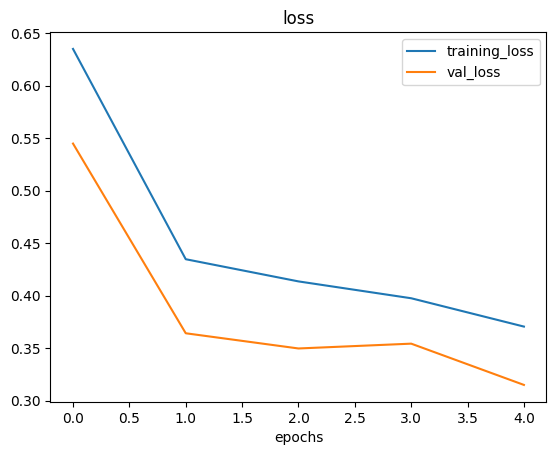

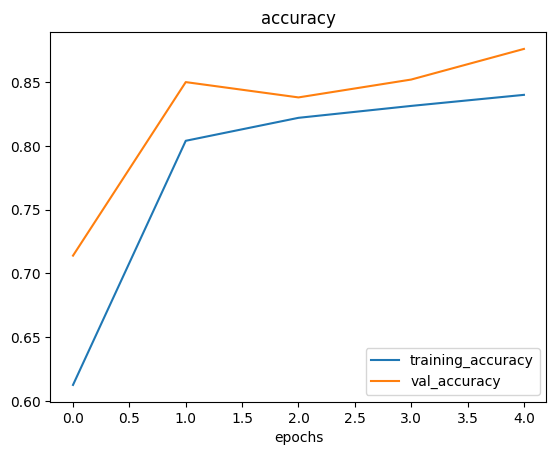

In [43]:
plot_loss_curves(history_5)

### Data Augmentation

Process of alterling the training data , leading it to have more diversity and in turn allowing our models to learn generalizable patterns. Altering might mean adjusting the image,zooming, rotating, flipping it, changing it's height etc

In [44]:
#Create Image DataGenerator training instance with data augmentation
train_datagen_augmented=ImageDataGenerator(
    rescale=1/255.,
    rotation_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.3,
    horizontal_flip=True

)

#Create Image Data Generator without Data Augmentation
train_datagen=ImageDataGenerator(rescale=1/255.)

#Create ImageDataGenerator without data augmentation for the test dataset
test_datagen=ImageDataGenerator(rescale=1/255.)


In [45]:
#import data and augment it from training directory
train_data_augmented= train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224,224),
                                                                  batch_size=32,
                                                                  class_mode='binary',
                                                                  shuffle=False)

print("Non-Augmented Training Data")
#Create non-augmented databatches
train_data=train_datagen.flow_from_directory(train_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode='binary',
                                             shuffle=False)

IM_SIZE=(224,224)
#Create Non- Augmented Test Data 
print("Non- Augmented Test Data")
test_data=test_datagen.flow_from_directory(test_dir,
                                           batch_size=32,
                                           target_size=IM_SIZE,
                                           class_mode='binary')



Found 1500 images belonging to 2 classes.
Non-Augmented Training Data
Found 1500 images belonging to 2 classes.
Non- Augmented Test Data
Found 500 images belonging to 2 classes.


Data Augmentation is usually only performed on training Data. Using Imagedatagenerator built-in data augmentation parameters our images are left as they are in the directories but are modified when they are loaded to the model/session

In [46]:
#Visualize some augmented data
#Get some sample augmented data batches
images, labels = train_data.next()
augmented_images, augmented_labels= train_data_augmented.next() #Labels aren't augmented. Only data is


Text(0.5, 1.0, 'Augmented Images')

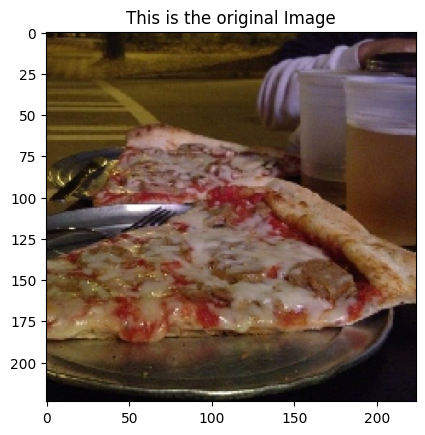

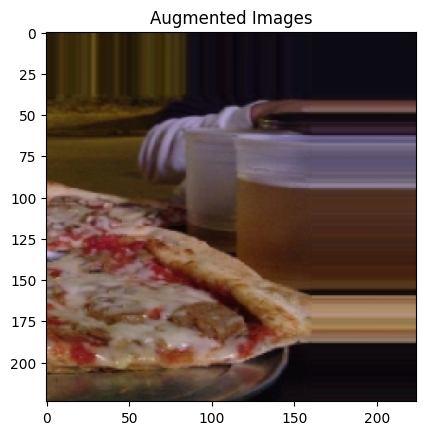

In [47]:
#Show original images and augmented images
import random
random_number=random.randint(0,31) #Our batch sizes are 32
plt.imshow(images[random_number])
plt.title(f"This is the original Image")
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented Images")

In [48]:
model_6=Sequential([
    Conv2D(10,3,activation='relu', input_shape=(224,224,3)),
    MaxPool2D(pool_size=2), #Halves the no. of features. You can notice that in the summary of the model
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation='sigmoid')

])

In [49]:
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [50]:
history_6=model_6.fit(train_data_augmented,
                      epochs=5,
                      steps_per_epoch=len(train_data_augmented),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 42s 865ms/step - loss: 0.7057 - accuracy: 0.4460 - val_loss: 0.6900 - val_accuracy: 0.5800
Epoch 2/5
47/47 [==============================] - 34s 726ms/step - loss: 0.6963 - accuracy: 0.4787 - val_loss: 0.6872 - val_accuracy: 0.5600
Epoch 3/5
47/47 [==============================] - 26s 563ms/step - loss: 0.6920 - accuracy: 0.5273 - val_loss: 0.6728 - val_accuracy: 0.5060
Epoch 4/5
47/47 [==============================] - 24s 512ms/step - loss: 0.6933 - accuracy: 0.5380 - val_loss: 0.6530 - val_accuracy: 0.5320
Epoch 5/5
47/47 [==============================] - 24s 505ms/step - loss: 0.6567 - accuracy: 0.6140 - val_loss: 0.6082 - val_accuracy: 0.7360


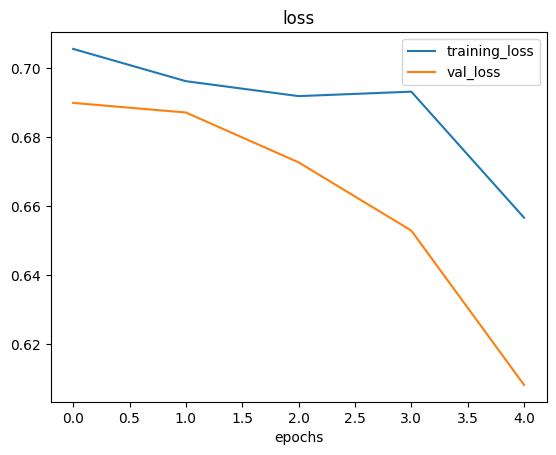

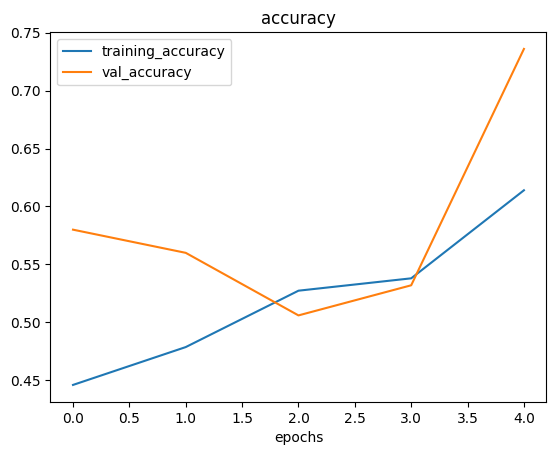

In [51]:
#Check our models Training Curves 
plot_loss_curves(history_6)

In [52]:
#import data and augment it from training directory
train_data_augmented_shuffled= train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224,224),
                                                                  batch_size=32,
                                                                  class_mode='binary',
                                                                  shuffle=True)

Found 1500 images belonging to 2 classes.


In [53]:
#Create the model ( this is going to be our new baseline)
model_7=Sequential([
    Conv2D(10,3,activation='relu', input_shape=(224,224,3)),
    MaxPool2D(pool_size=2), #Halves the no. of features. You can notice that in the summary of the model
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation='sigmoid')

])

In [54]:
model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=['accuracy'])

In [55]:
history_7=model_7.fit(train_data_augmented_shuffled,
                      epochs=5,
                      steps_per_epoch=len(train_data_augmented_shuffled),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 37s 762ms/step - loss: 0.6803 - accuracy: 0.5640 - val_loss: 0.5646 - val_accuracy: 0.6980
Epoch 2/5
47/47 [==============================] - 24s 515ms/step - loss: 0.5491 - accuracy: 0.7133 - val_loss: 0.3897 - val_accuracy: 0.8220
Epoch 3/5
47/47 [==============================] - 25s 525ms/step - loss: 0.5257 - accuracy: 0.7467 - val_loss: 0.5116 - val_accuracy: 0.7100
Epoch 4/5
47/47 [==============================] - 30s 650ms/step - loss: 0.4970 - accuracy: 0.7647 - val_loss: 0.3668 - val_accuracy: 0.8460
Epoch 5/5
47/47 [==============================] - 33s 693ms/step - loss: 0.4733 - accuracy: 0.7713 - val_loss: 0.3559 - val_accuracy: 0.8480


### 7. Repeat Until Satisfied

There are a few more things that we can do to inprove our model
* Increase the number of model layers
* Increase the number of filters in each conv layer(32/64 etc)
* Train for longer
* Find an ideal learning rate
* Get more data
* use transfer learning to leverage what other image model has learnt and adjust it for our use case.

# Making a prediction with out trained model on owr custom data

--2023-05-26 08:54:30--  https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-steak.jpeg
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘03-steak.jpeg.2’

03-steak.jpeg.2         [ <=>                ] 140.08K  --.-KB/s    in 0.009s  

2023-05-26 08:54:30 (15.4 MB/s) - ‘03-steak.jpeg.2’ saved [143442]



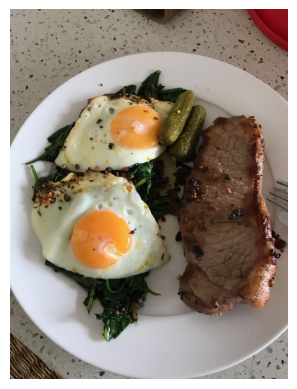

In [62]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-steak.jpeg
steak=mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [63]:
model_7.predict(tf.expand_dims(steak,axis=0))

ValueError: ignored

When you train a NN, and you want to make a prediction with it on your own data, make sure that the data is preprocessed as the same format as the data was trained on.

In [64]:
#Create a function to import an image and resize it to be able to get processed on the model we created
def load_and_prep_image(filename,img_shape=224):
  """
  Reads image from filename , turns it into a tensor and reshape it to (img_shape, img_shape,color_channels)
  """
  img=tf.io.read_file(filename)
  #Decode the read file into a tensor
  img=tf.image.decode_image(img)
  #resize the image
  img=tf.image.resize(img, size=[img_shape,img_shape])
  #Rescale the image and bring all values b/w 0-1
  img=img/255.
  return img

In [66]:
steak=load_and_prep_image("03-steak.jpeg")

In [67]:
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [69]:
pred=model_7.predict(tf.expand_dims(steak,axis=0))

1/1 [==============================] - 0s 23ms/step


In [71]:
#We can index the predicted class by rounding the prediction probability and indexing on the class name
pred_class=class_names[int(tf.round(pred))]
pred_class

'steak'

In [72]:
def pred_and_plot(model, filename, classnames=class_names):
  """
  Imports an image located at filename , makes a prediction with model and plots the image with the predicted class as the title
  """

  img=load_and_prep_image(filename)

  pred=model.predict(tf.expand_dims(img, axis=0))

  pred_class=class_names[int(tf.round(pred))]

  #plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);
  

1/1 [==============================] - 0s 92ms/step


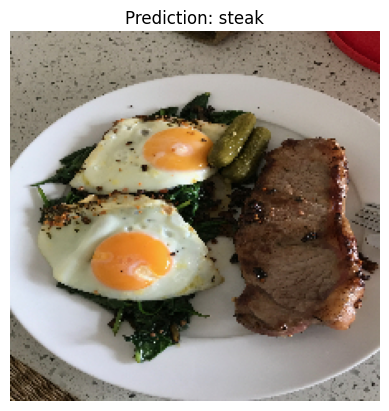

In [73]:
pred_and_plot(model_7, "03-steak.jpeg")

# Multiclass Image classification

1. Become one iwth the data
2. Preprocess the data
3. Create a model
4. Fit the mdeol (overfir it to make sure it wors)
5. Evaluate the model
6. Adjust hyperparameters
7. Repeat until satisfied

In [75]:
## 1. Import and become one with the data
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

zip_ref=zipfile.ZipFile("10_food_classes_all_data.zip","r")
zip_ref.extractall()
zip_ref.close()

--2023-05-26 09:31:36--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.12.128, 172.217.194.128, 74.125.68.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.12.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.1’

10_food_classes_all 100%[===================>] 495.13M  17.2MB/s    in 31s     

2023-05-26 09:32:07 (16.0 MB/s) - ‘10_food_classes_all_data.zip.1’ saved [519183241/519183241]



In [76]:
import os

In [78]:
#Walk through 10 classes of foor image data
for dirpath, dirnames, filenames, in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} files in {dirpath} ")

There are 2 directories and 0 files in 10_food_classes_all_data 
There are 10 directories and 0 files in 10_food_classes_all_data/train 
There are 0 directories and 750 files in 10_food_classes_all_data/train/steak 
There are 0 directories and 750 files in 10_food_classes_all_data/train/fried_rice 
There are 0 directories and 750 files in 10_food_classes_all_data/train/chicken_curry 
There are 0 directories and 750 files in 10_food_classes_all_data/train/chicken_wings 
There are 0 directories and 750 files in 10_food_classes_all_data/train/sushi 
There are 0 directories and 750 files in 10_food_classes_all_data/train/hamburger 
There are 0 directories and 750 files in 10_food_classes_all_data/train/ramen 
There are 0 directories and 750 files in 10_food_classes_all_data/train/grilled_salmon 
There are 0 directories and 750 files in 10_food_classes_all_data/train/pizza 
There are 0 directories and 750 files in 10_food_classes_all_data/train/ice_cream 
There are 10 directories and 0 file

In [79]:
#Setup the train and test direcories
train_dir="10_food_classes_all_data/train/"
test_dir="10_food_classes_all_data/test/"

In [82]:
#Let's get the subdirectories(Classnames)
import pathlib
import numpy as np

data_dir= pathlib.Path(train_dir)
class_names=np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Image shape: (512, 512, 3)


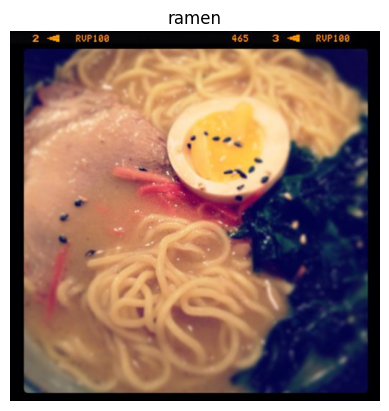

In [86]:
import random
img=view=view_random_image(target_dir=train_dir,
                           target_class=random.choice(class_names))